# Data Inspection of NYC's 311 Street Flooding Complaints Data
Author: Mark Bauer

# Objective
In this notebook, we inspect and preview our data before we begin analysis. Specifically, I attempt to inspect the following items:

- Shape of the data
- Identify columns and data types
- Descriptive or summary statistics
- Values within each column
- Number of null values
- Evaluate columns and/or rows to drop

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Datasets

## 311 Service Requests from 2010 to Present  
Website: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

311's data dictionary can be found in the data folder. 



![311](../images/nyc-311-screenshot.png)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
# printing versions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy  : 1.23.4
pandas : 1.5.1
seaborn: 0.12.1



Documention for installing watermark: https://github.com/rasbt/watermark

In [3]:
# data retrieved
current_date = datetime.now()
print(f"This notebook was executed on {current_date.strftime('%Y-%m-%d')}.")

This notebook was executed on 2025-04-06.


# Reading In Data

In [4]:
# list items in data folder
%ls data/

ls: data/: No such file or directory


In [5]:
# read data as a dataframe
path = '../data/street-flooding-complaints.csv'
df = pd.read_csv(path, low_memory=False)

# shape of data and preview first five rows
print(f'shape of data: {df.shape}')
df.head()

shape of data: (25747, 32)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,cross_street_1,cross_street_2,intersection_street_1,...,city,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,incident_address,street_name,bbl,due_date
0,18265181,2010-07-14T08:38:00.000,2010-07-14T08:38:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),PELHAM PKWY,STILLWELL AVE,PELHAM PKWY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34783066,2016-11-15T09:27:00.000,2016-11-15T10:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,LAFAYETTE AVENUE,...,STATEN ISLAND,958594.0,170855.0,40.635597,-74.092438,"{'latitude': '40.635596930697716', 'longitude'...",NaN,NaN,NaN,NaN
2,21549616,2011-09-29T10:34:00.000,2011-09-30T10:40:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,THURSBY AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35839080,2017-03-31T20:24:00.000,2017-04-01T02:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),3 AVENUE,2 AVENUE,NaN,...,NEW YORK,NaN,NaN,NaN,NaN,NaN,EAST 106 STREET,EAST 106 STREET,NaN,NaN
4,29443390,2014-12-06T10:23:00.000,2014-12-06T11:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NAGLE AVE,DYCKMAN ST,NAGLE AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Inspection

In [6]:
# printing the column names, non-null counts, and data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25746 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   cross_street_1                  22472 non-null  object 
 8   cross_street_2                  22464 non-null  object 
 9   intersection_street_1           9616 non-null   object 
 10  intersection_street_2           9616 non-null   object 
 11  address_type                    25741 non-null  object 
 12  facility_type                   

For `facility_type`, all values were casted as null by pandas. Examining the query confirms these were all null string values. We can drop this column later, as it contains no data.

In [7]:
# unique_key column is unique
df['unique_key'].is_unique

True

In [8]:
# inspecting date range
min_date = df['created_date'].min()
max_date = df['created_date'].max()

print(f'This dataset is from {min_date} to {max_date}')

This dataset is from 2010-01-02T08:26:00.000 to 2019-12-31T22:42:00.000


## Inspecting Items In Each Column
Slicing columns in two views for size.

In [9]:
# preview first five rows, first 15 columns
df.iloc[:5, :15]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,facility_type,status,resolution_description
0,18265181,2010-07-14T08:38:00.000,2010-07-14T08:38:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),PELHAM PKWY,STILLWELL AVE,PELHAM PKWY,STILLWELL AVE,INTERSECTION,NaN,Closed,The Department of Environmental Protection inv...
1,34783066,2016-11-15T09:27:00.000,2016-11-15T10:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,LAFAYETTE AVENUE,BRIGHTON AVENUE,INTERSECTION,NaN,Closed,The Department of Environmental Protection has...
2,21549616,2011-09-29T10:34:00.000,2011-09-30T10:40:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,THURSBY AVE,GOVENER AVE,INTERSECTION,NaN,Closed,The Department of Environmental Protection inv...
3,35839080,2017-03-31T20:24:00.000,2017-04-01T02:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),3 AVENUE,2 AVENUE,NaN,NaN,BLOCKFACE,NaN,Closed,Please call 311 for further information. If yo...
4,29443390,2014-12-06T10:23:00.000,2014-12-06T11:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NAGLE AVE,DYCKMAN ST,NAGLE AVE,DYCKMAN ST,INTERSECTION,NaN,Closed,The Department of Environmental Protection inv...


In [10]:
# preview first five rows, 15th to last columns
df.iloc[:5, 15:]

,resolution_action_updated_date,community_board,borough,open_data_channel_type,park_facility_name,park_borough,incident_zip,city,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,incident_address,street_name,bbl,due_date
0,2010-07-14T08:30:00.000,Unspecified BRONX,BRONX,UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-11-15T10:05:00.000,01 STATEN ISLAND,STATEN ISLAND,PHONE,Unspecified,STATEN ISLAND,10301.0,STATEN ISLAND,958594.0,170855.0,40.635597,-74.092438,"{'latitude': '40.635596930697716', 'longitude'...",NaN,NaN,NaN,NaN
2,2011-09-30T10:40:00.000,Unspecified QUEENS,QUEENS,UNKNOWN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T02:25:00.000,11 MANHATTAN,MANHATTAN,PHONE,Unspecified,MANHATTAN,10029.0,NEW YORK,NaN,NaN,NaN,NaN,NaN,EAST 106 STREET,EAST 106 STREET,NaN,NaN
4,2014-12-06T11:30:00.000,Unspecified MANHATTAN,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# previewing top 5 most common value and corresponding count per given column
for col in df.columns:
    
    top_five = (
        df[col]
        .value_counts(dropna=False)
        .head()
    )
    
    print(f'{top_five}\n')

18265181    1
36582356    1
36599317    1
36603485    1
36599926    1
Name: unique_key, dtype: int64

2011-08-28T00:00:00.000    13
2019-10-27T13:22:00.000     7
2011-08-29T00:00:00.000     6
2017-05-05T13:49:00.000     6
2014-11-17T15:21:00.000     5
Name: created_date, dtype: int64

2017-05-06T08:30:00.000    36
2019-12-18T09:30:00.000    17
2018-09-28T10:30:00.000    13
2019-12-20T09:30:00.000    12
2019-05-14T09:30:00.000    12
Name: closed_date, dtype: int64

DEP    25747
Name: agency, dtype: int64

Department of Environmental Protection    25747
Name: agency_name, dtype: int64

Sewer    25747
Name: complaint_type, dtype: int64

Street Flooding (SJ)    25747
Name: descriptor, dtype: int64

NaN            3275
BEND            296
DEAD END        251
LINDEN BLVD     190
259 ST          133
Name: cross_street_1, dtype: int64

NaN                   3283
DEAD END               454
BEND                   351
BROADWAY               139
FRANCIS LEWIS BLVD     126
Name: cross_street_2, dty

The `park_facility_name` column has one value, `unspecified`. Although it is a data point, it is unnecessary in this analysis. Therefore, we can drop this column later.

Looking more closely at the `resolution_description` field.

In [12]:
# preview description
(df['resolution_description']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'resolution_description', 'resolution_description':'count'})
 .head()
)

,resolution_description,count
0,The Department of Environment Protection inspe...,9558
1,Please call 311 for further information. If yo...,4659
2,The Department of Environmental Protection ins...,2901
3,The Department of Environmental Protection inv...,2503
4,The Department of Environmental Protection has...,1367


In [13]:
print('Top 10 Resolution Descriptions In Descending Order:\n')

for i in range(1, 11):
    res = df['resolution_description'].value_counts().index[i]
    count = df['resolution_description'].value_counts()[i]
    
    print(f'{i}. {res}')
    print(f'-- Count: {count:,}\n')

Top 10 Resolution Descriptions In Descending Order:

1. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).
-- Count: 4,659

2. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 2,901

3. The Department of Environmental Protection investigated this complaint and resolved the street flooding.
-- Count: 2,503

4. The Department of Environmental Protection has determined that this issue was previously reported by another customer The original complaint is being addressed. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 1,367

5. The Department of Environmental Protection inspected your complaint and

## Calculating Summary Statistics

In [14]:
# summary statistics for numeric columns
df.describe()

,unique_key,facility_type,incident_zip,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,bbl
count,2.574700e+04,0.0,24899.000000,2.481700e+04,24817.000000,24817.000000,24817.000000,1.460300e+04
mean,3.121269e+07,NaN,10965.011045,1.005282e+06,185921.310996,40.676892,-73.924100,3.712649e+09
std,8.489789e+06,NaN,539.927586,3.529875e+04,30616.219838,0.084035,0.127214,1.079234e+09
min,1.563993e+07,NaN,10001.000000,9.133570e+05,121032.000000,40.498628,-74.254937,0.000000e+00
25%,2.377842e+07,NaN,10312.000000,9.865360e+05,160993.000000,40.608412,-73.991761,3.063260e+09
50%,3.150598e+07,NaN,11221.000000,1.007456e+06,183284.000000,40.669620,-73.916348,4.071170e+09
75%,3.900391e+07,NaN,11385.000000,1.034095e+06,206491.000000,40.733373,-73.820150,4.157320e+09
max,4.852609e+07,NaN,11697.000000,1.067038e+06,271876.000000,40.912869,-73.701229,5.080500e+09


In [15]:
# summary statistics for string columns, transpose for readibility
df.describe(include=['O']).T

,count,unique,top,freq
created_date,25747,24402,2011-08-28T00:00:00.000,13
closed_date,25746,23376,2017-05-06T08:30:00.000,36
agency,25747,1,DEP,25747
agency_name,25747,1,Department of Environmental Protection,25747
complaint_type,25747,1,Sewer,25747
descriptor,25747,1,Street Flooding (SJ),25747
cross_street_1,22472,4503,BEND,296
cross_street_2,22464,4548,DEAD END,454
intersection_street_1,9616,2752,BROADWAY,93
intersection_street_2,9616,2771,BROADWAY,164


In [16]:
# compute pairwise correlation of columns
df.corr(numeric_only=True)

,unique_key,facility_type,incident_zip,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,bbl
unique_key,1.000000,NaN,0.024345,0.014510,0.022053,0.022055,0.014512,-0.010929
facility_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_zip,0.024345,NaN,1.000000,0.708516,-0.097877,-0.098335,0.708151,0.125336
x_coordinate_state_plane,0.014510,NaN,0.708516,1.000000,0.460252,0.459604,0.999999,-0.205561
y_coordinate_state_plane,0.022053,NaN,-0.097877,0.460252,1.000000,0.999999,0.460856,-0.583355
latitude,0.022055,NaN,-0.098335,0.459604,0.999999,1.000000,0.460207,-0.583845
longitude,0.014512,NaN,0.708151,0.999999,0.460856,0.460207,1.000000,-0.205524
bbl,-0.010929,NaN,0.125336,-0.205561,-0.583355,-0.583845,-0.205524,1.000000


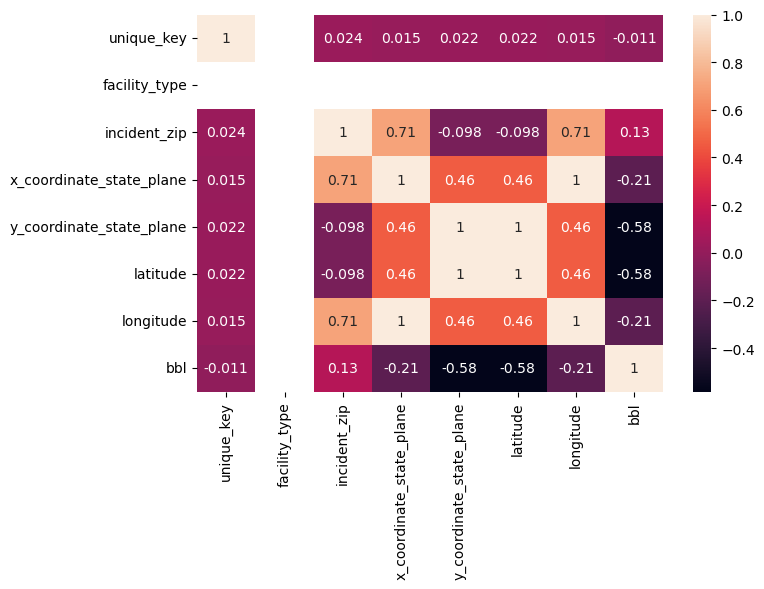

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## Identify Null Values

In [18]:
print(f'shape of data for referance: {df.shape}')
print('count nulls per column:')

(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

shape of data for referance: (25747, 32)
count nulls per column:


facility_type                     25747
due_date                          25746
intersection_street_1             16131
intersection_street_2             16131
bbl                               11144
street_name                        9559
incident_address                   9559
cross_street_2                     3283
cross_street_1                     3275
location                            930
longitude                           930
latitude                            930
y_coordinate_state_plane            930
x_coordinate_state_plane            930
incident_zip                        848
city                                846
address_type                          6
resolution_description                4
closed_date                           1
park_borough                          0
unique_key                            0
park_facility_name                    0
open_data_channel_type                0
borough                               0
created_date                          0


In [19]:
counts = df.isnull().sum().sum()

print(f'sum of all nulls in all columns: {counts:,}')

sum of all nulls in all columns: 126,930


In [20]:
# calculating percentage of nulls values for each column
missing_data = (
    df
    .isnull()
    .sum()
    .div(df.shape[0])
    .mul(100)
)

missing_data.sort_values(ascending=False)

facility_type                     100.000000
due_date                           99.996116
intersection_street_1              62.651959
intersection_street_2              62.651959
bbl                                43.282713
street_name                        37.126656
incident_address                   37.126656
cross_street_2                     12.751000
cross_street_1                     12.719929
location                            3.612071
longitude                           3.612071
latitude                            3.612071
y_coordinate_state_plane            3.612071
x_coordinate_state_plane            3.612071
incident_zip                        3.293588
city                                3.285820
address_type                        0.023304
resolution_description              0.015536
closed_date                         0.003884
park_borough                        0.000000
unique_key                          0.000000
park_facility_name                  0.000000
open_data_

In [21]:
# column has all null values
(df
 .isnull()
 .all()
 .sort_values(ascending=False)
)

facility_type                      True
unique_key                        False
borough                           False
bbl                               False
street_name                       False
incident_address                  False
location                          False
longitude                         False
latitude                          False
y_coordinate_state_plane          False
x_coordinate_state_plane          False
city                              False
incident_zip                      False
park_borough                      False
park_facility_name                False
open_data_channel_type            False
community_board                   False
created_date                      False
resolution_action_updated_date    False
resolution_description            False
status                            False
address_type                      False
intersection_street_2             False
intersection_street_1             False
cross_street_2                    False


We can drop any column that has only null values.

In [22]:
# drop blank columns
criteria = df.isnull().all()
df = df.loc[:, df.columns[~criteria]]

print(f'shape of data: {df.shape}\n')
df.info()

shape of data: (25747, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25746 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   cross_street_1                  22472 non-null  object 
 8   cross_street_2                  22464 non-null  object 
 9   intersection_street_1           9616 non-null   object 
 10  intersection_street_2           9616 non-null   object 
 11  address_type                    25741 non-null  object 
 12  stat

A handful of columns have high null value counts. Let's drop columns with missing data > 50%.

In [23]:
# drop columns with missing data > 50%
missing_data = (df.isnull().sum() / df.shape[0]) * 100
criteria = missing_data <= 50

df = df.loc[:, df.columns[criteria]]
print(f'shape of data: {df.shape}')
print('% null per column:')

# preview new columns and % null values
(df
 .isnull()
 .sum()
 .div(df.shape[0])
 .mul(100)
 .sort_values(ascending=False)
 .round(3)
)

shape of data: (25747, 28)
% null per column:


bbl                               43.283
street_name                       37.127
incident_address                  37.127
cross_street_2                    12.751
cross_street_1                    12.720
location                           3.612
longitude                          3.612
latitude                           3.612
y_coordinate_state_plane           3.612
x_coordinate_state_plane           3.612
incident_zip                       3.294
city                               3.286
address_type                       0.023
resolution_description             0.016
closed_date                        0.004
park_borough                       0.000
unique_key                         0.000
park_facility_name                 0.000
open_data_channel_type             0.000
created_date                       0.000
community_board                    0.000
resolution_action_updated_date     0.000
status                             0.000
descriptor                         0.000
complaint_type  

Drop `park_facility_name` column.

In [24]:
# confirm only one value, not useful for analysis
df['park_facility_name'].value_counts()

Unspecified    25747
Name: park_facility_name, dtype: int64

In [25]:
# column to drop
columns = ['park_facility_name']
df = df.drop(columns=columns)

print(f'shape of data: {df.shape}\n')
df.info()

shape of data: (25747, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25746 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   cross_street_1                  22472 non-null  object 
 8   cross_street_2                  22464 non-null  object 
 9   address_type                    25741 non-null  object 
 10  status                          25747 non-null  object 
 11  resolution_description          25743 non-null  object 
 12  reso

## Inspect Geographic Data

In [26]:
# preview columns
df.iloc[:10, -4:]

,location,incident_address,street_name,bbl
0,NaN,NaN,NaN,NaN
1,"{'latitude': '40.635596930697716', 'longitude'...",NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,EAST 106 STREET,EAST 106 STREET,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,"{'latitude': '40.75729226742685', 'longitude':...",NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,"{'latitude': '40.69378840426638', 'longitude':...",110-07 164 PLACE,164 PLACE,4.101930e+09


In [27]:
# summary statistics
df.loc[:, ['longitude', 'latitude']].describe()

,longitude,latitude
count,24817.000000,24817.000000
mean,-73.924100,40.676892
std,0.127214,0.084035
min,-74.254937,40.498628
25%,-73.991761,40.608412
50%,-73.916348,40.669620
75%,-73.820150,40.733373
max,-73.701229,40.912869


In [28]:
# examine nulls
df.loc[:, ['longitude', 'latitude']].isnull().sum()

longitude    930
latitude     930
dtype: int64

In [29]:
# check unique value counts
(df
 .groupby(by=['longitude', 'latitude'])['unique_key']
 .count()
 .sort_values(ascending=False)
 .head(20)
)

longitude   latitude 
-73.739237  40.676373    59
-73.992633  40.758429    54
-73.761441  40.696738    48
-74.116525  40.555641    48
-74.093358  40.574843    43
-73.856743  40.668609    42
-73.856848  40.668603    40
-73.857066  40.669512    39
-73.780482  40.665178    39
-74.178223  40.599827    38
-73.729519  40.657434    37
-73.862078  40.712202    37
-73.802154  40.682979    36
-73.780311  40.665392    36
-74.116625  40.555493    35
-74.095230  40.575190    34
-73.870629  40.713293    33
-73.785655  40.687239    32
-74.166889  40.560476    30
-73.908378  40.875683    27
Name: unique_key, dtype: int64

It doesn't appear to look like there are default locations assigned to null values.

In [30]:
# examine nulls
null_geo = (
    df
    .loc[(df['longitude'].isnull()) | (df['latitude'].isnull())]
    .reset_index(drop=True)
)

(null_geo
 .isnull()
 .sum()
 .div(null_geo.shape[0])
 .mul(100)
 .sort_values(ascending=False)
)

bbl                               100.000000
location                          100.000000
longitude                         100.000000
latitude                          100.000000
y_coordinate_state_plane          100.000000
x_coordinate_state_plane          100.000000
incident_zip                       91.182796
city                               90.967742
street_name                        80.000000
incident_address                   80.000000
cross_street_2                     30.322581
cross_street_1                     30.000000
address_type                        0.645161
open_data_channel_type              0.000000
park_borough                        0.000000
unique_key                          0.000000
borough                             0.000000
created_date                        0.000000
resolution_action_updated_date      0.000000
resolution_description              0.000000
status                              0.000000
descriptor                          0.000000
complaint_

In [31]:
print('Top 10 Resolution Descriptions in Descending Order:\n')

for i in range(1, 11):
    res = null_geo['resolution_description'].value_counts(dropna=False).index[i]
    count = null_geo['resolution_description'].value_counts(dropna=False)[i]
    
    print(f'{i}. {res}')
    print(f'-- Count: {count:,}\n')

Top 10 Resolution Descriptions in Descending Order:

1. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).
-- Count: 172

2. The Department of Environmental Protection investigated this complaint and resolved the street flooding.
-- Count: 126

3. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 49

4. The Department of Environmental Protection inspected your complaint and cleaned the catch basin or inlet. If the condition returns, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 48

5. The Department of Environmental Protection has determined that this issue was previously reported by another customer The original compla

Without location data, it's difficult to utilize these complaints and detect which areas have risk of flooding. Because of this constraint, let's drop these records without lat/lon from this analysis.

In [32]:
df = (
    df
    .loc[
        (df['longitude'].notnull())
        & (df['latitude'].notnull())]
    .reset_index(drop=True)
)

print(f'shape of data: {df.shape}')
df.head()

shape of data: (24817, 27)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,cross_street_1,cross_street_2,address_type,...,incident_zip,city,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,incident_address,street_name,bbl
0,34783066,2016-11-15T09:27:00.000,2016-11-15T10:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,INTERSECTION,...,10301.0,STATEN ISLAND,958594.0,170855.0,40.635597,-74.092438,"{'latitude': '40.635596930697716', 'longitude'...",NaN,NaN,NaN
1,36178846,2017-05-13T14:41:00.000,2017-11-08T11:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),32 AVE,78 ST,INTERSECTION,...,11370.0,East Elmhurst,1014871.0,215198.0,40.757292,-73.889472,"{'latitude': '40.75729226742685', 'longitude':...",NaN,NaN,NaN
2,31360389,2015-08-21T05:46:00.000,2015-08-26T10:27:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),110 AVE,110 RD,ADDRESS,...,11433.0,JAMAICA,1043288.0,192114.0,40.693788,-73.787102,"{'latitude': '40.69378840426638', 'longitude':...",110-07 164 PLACE,164 PLACE,4.101930e+09
3,32686230,2016-02-15T13:10:00.000,2016-02-16T14:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),ALDUS ST,HOE AVE,INTERSECTION,...,10459.0,BRONX,1014578.0,239190.0,40.823145,-73.890421,"{'latitude': '40.82314481234778', 'longitude':...",NaN,NaN,NaN
4,41495135,2019-01-23T11:59:00.000,2019-01-28T13:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),102 ST,DEAD END,ADDRESS,...,11414.0,HOWARD BEACH,1031172.0,179312.0,40.658722,-73.830883,"{'latitude': '40.65872239939313', 'longitude':...",102-20 160 AVENUE,160 AVENUE,4.142340e+09


In [33]:
# examine cleaned dataset % null values per column
(df
 .isnull()
 .sum()
 .div(df.shape[0])
 .mul(100)
 .sort_values(ascending=False)
 .round(3)
)

bbl                               41.157
street_name                       35.520
incident_address                  35.520
cross_street_2                    12.093
cross_street_1                    12.072
resolution_description             0.016
closed_date                        0.004
park_borough                       0.000
location                           0.000
longitude                          0.000
latitude                           0.000
y_coordinate_state_plane           0.000
x_coordinate_state_plane           0.000
city                               0.000
incident_zip                       0.000
unique_key                         0.000
open_data_channel_type             0.000
borough                            0.000
created_date                       0.000
resolution_action_updated_date     0.000
status                             0.000
address_type                       0.000
descriptor                         0.000
complaint_type                     0.000
agency_name     

# Write Out Clean Dataset

In [34]:
outfile = '../data/street-flooding-complaints-cleaned.csv'
df.to_csv(outfile, index=False)

# sanity check, listing items in data folder
%ls ../data/

README.md                               streets-clipped.gpkg
street-flooding-complaints-cleaned.csv  streets.gpkg
street-flooding-complaints.csv          water-main-break-raw.csv
street-flooding-raw.csv                 water-main-breaks.csv


In [35]:
# sanity check
path = '../data/street-flooding-complaints-cleaned.csv'

pd.read_csv(path).head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,cross_street_1,cross_street_2,address_type,...,incident_zip,city,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,incident_address,street_name,bbl
0,34783066,2016-11-15T09:27:00.000,2016-11-15T10:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NaN,NaN,INTERSECTION,...,10301.0,STATEN ISLAND,958594.0,170855.0,40.635597,-74.092438,"{'latitude': '40.635596930697716', 'longitude'...",NaN,NaN,NaN
1,36178846,2017-05-13T14:41:00.000,2017-11-08T11:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),32 AVE,78 ST,INTERSECTION,...,11370.0,East Elmhurst,1014871.0,215198.0,40.757292,-73.889472,"{'latitude': '40.75729226742685', 'longitude':...",NaN,NaN,NaN
2,31360389,2015-08-21T05:46:00.000,2015-08-26T10:27:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),110 AVE,110 RD,ADDRESS,...,11433.0,JAMAICA,1043288.0,192114.0,40.693788,-73.787102,"{'latitude': '40.69378840426638', 'longitude':...",110-07 164 PLACE,164 PLACE,4.101930e+09
3,32686230,2016-02-15T13:10:00.000,2016-02-16T14:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),ALDUS ST,HOE AVE,INTERSECTION,...,10459.0,BRONX,1014578.0,239190.0,40.823145,-73.890421,"{'latitude': '40.82314481234778', 'longitude':...",NaN,NaN,NaN
4,41495135,2019-01-23T11:59:00.000,2019-01-28T13:05:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),102 ST,DEAD END,ADDRESS,...,11414.0,HOWARD BEACH,1031172.0,179312.0,40.658722,-73.830883,"{'latitude': '40.65872239939313', 'longitude':...",102-20 160 AVENUE,160 AVENUE,4.142340e+09
5,38441823,2018-02-11T11:16:00.000,2018-02-11T14:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),ARLINGTON PL,STATEN ISLAND RAILWAY LINE,ADDRESS,...,10303.0,STATEN ISLAND,938112.0,170661.0,40.634981,-74.166232,"{'latitude': '40.63498143692319', 'longitude':...",202 SOUTH AVENUE,SOUTH AVENUE,5.012660e+09
6,42815099,2019-05-30T08:25:00.000,2019-06-04T11:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),LEYDEN AVE,BRABANT ST,ADDRESS,...,10303.0,STATEN ISLAND,939746.0,169844.0,40.632747,-74.160340,"{'latitude': '40.63274730944659', 'longitude':...",157 HARBOR ROAD,HARBOR ROAD,5.012280e+09
7,15639934,2010-01-02T08:26:00.000,2010-01-03T08:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),LOIS AVE,SEBA AVE,ADDRESS,...,11229.0,BROOKLYN,1005975.0,153432.0,40.587785,-73.921781,"{'latitude': '40.58778491597503', 'longitude':...",39 DARE COURT,DARE COURT,3.089000e+09
8,15640664,2010-01-02T17:45:00.000,2010-01-12T11:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),116 AVE,FOCH BLVD,ADDRESS,...,11436.0,Jamaica,1041026.0,187595.0,40.681400,-73.795297,"{'latitude': '40.68139962026673', 'longitude':...",116-14 146 STREET,146 STREET,4.120050e+09
9,15640572,2010-01-02T12:00:00.000,2010-01-02T15:12:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),NEWARK AVE,RICHMOND TER,INTERSECTION,...,10302.0,STATEN ISLAND,944481.0,171989.0,40.638657,-74.143293,"{'latitude': '40.63865739388004', 'longitude':...",NaN,NaN,NaN
